In [6]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import numpy as np
from road_recognition.dataset import Dataset
from road_recognition.data import DataSource, DataConfig
from constans import BATCH_SIZE, PROJECT_PATHS
from road_recognition.models.metrics import iou_coef, dice_coef, dice_coef_loss
from road_recognition.data import CONFIG_DEEP_GLOBE, CONFIG_KAGGLE_SATELITE
from keras.models import Model
import random
import cv2

In [7]:
models_names = [
    "unet_base_1_dice_dg",
    "unet_modified_1_dice_dg",
    "psinet_dice_dg",
]

models: dict[str, Model] = {}
for dir_ in models_names:
    path = PROJECT_PATHS.models / dir_ / "model.keras"
    models[dir_] = load_model(
        path,
        custom_objects={
            "iou_coef": iou_coef,
            "dice_coef": dice_coef,
            "dice_coef_loss": dice_coef_loss,
        }
    )


In [8]:
random.seed(1)
ds = Dataset(CONFIG_KAGGLE_SATELITE, batch_size=BATCH_SIZE, size=10_000)
ds.split_dataset()
images_to_show = 3
test_sample, test_labels = ds.get_random_sample(images_to_show)

In [9]:
predictions = {}
for name, model in models. items():
    preds = model.predict(test_sample)
    predictions[name] = preds


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 678ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [4.0894138428733245e-22..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [8.383935733158321e-09..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [1.1014960574994648e-28..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [2.6316103671208957e-08..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [1.4683749584979281e-21..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [8.856257524211819e-10..255.0].


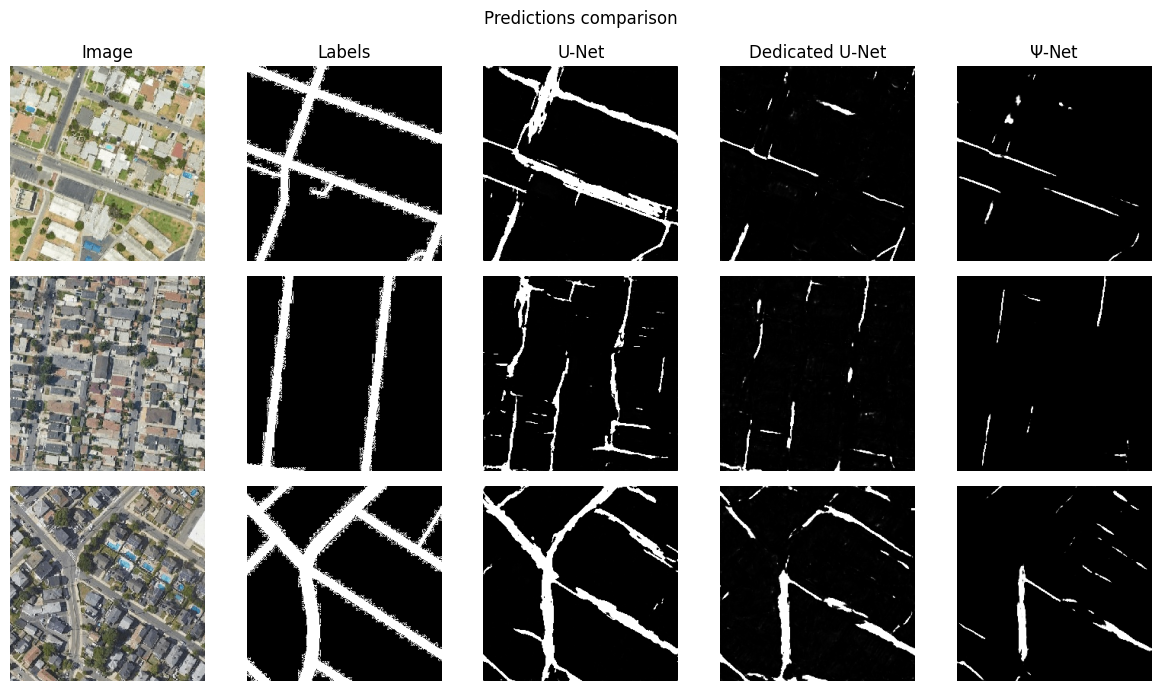

In [11]:
fig, axes = plt.subplots(3, 5, figsize=(12, 7), sharex=True, sharey=True)
axes[0, 0].set_title("Image")
axes[0, 1].set_title("Labels")
axes[0, 2].set_title("U-Net")
axes[0, 3].set_title("Dedicated U-Net")
axes[0, 4].set_title("$\\Psi$-Net")
for i in range(len(test_sample)):
    image = (test_sample[i] * 255).astype(np.uint8)
    axes[i, 0].imshow(image)
    axes[i, 0].axis('off')

    label = (test_labels[i] * 255).astype(np.uint8)
    label = np.repeat(label, 3, axis=2)
    label_yellow_mask = np.array([255, 255, 255]) * label
    axes[i, 1].imshow(label)
    axes[i, 1].axis('off')

    baseline = predictions["unet_base_1_dice_dg"][i]
    baseline = np.repeat(baseline, 3, axis=2)
    baseline_yellow_mask = np.array([255, 255, 255]) * baseline
    axes[i, 2].imshow(baseline_yellow_mask)
    axes[i, 2].axis('off')

    dedicated = predictions["unet_modified_1_dice_dg"][i]
    dedicated = np.repeat(dedicated, 3, axis=2)
    dedicated_yellow_mask = np.array([255, 255, 255]) * dedicated
    axes[i, 3].imshow(dedicated_yellow_mask)
    axes[i, 3].axis('off')

    psinet = predictions["psinet_dice_dg"][i]
    psinet = np.repeat(psinet, 3, axis=2)
    psinet_yellow_mask = np.array([255, 255, 255]) * psinet
    axes[i, 4].imshow(psinet)
    axes[i, 4].axis('off')

fig.suptitle("Predictions comparison")
plt.tight_layout()